<a href="https://colab.research.google.com/github/sai-sudo/HR_Prediction-/blob/main/LogisticRegressionHR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


In [311]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [312]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [313]:
df.shape


(14999, 10)

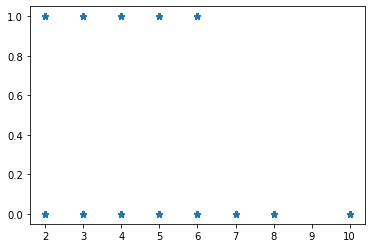

In [347]:
plt.scatter(df.time_spend_company,df.left,marker='*')

**We will find out the correlation between the variables and will only use the variables having high correlation with the output column**

In [314]:
 corr_matrix = df.corr()
 corr_matrix['left'].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

In [315]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [316]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

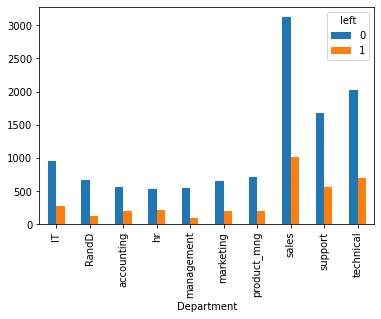

In [317]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

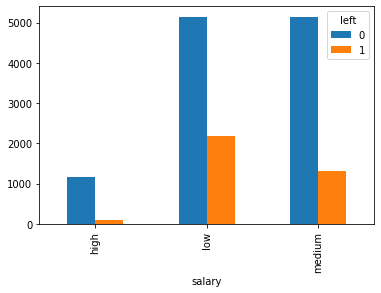

In [318]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

In [319]:
new_df=df[['satisfaction_level','average_montly_hours','salary','time_spend_company','Work_accident','number_project']]

In [320]:
new_df.head(10)

,satisfaction_level,average_montly_hours,salary,time_spend_company,Work_accident,number_project
0,0.38,157,low,3,0,2
1,0.80,262,medium,6,0,5
2,0.11,272,medium,4,0,7
3,0.72,223,low,5,0,5
4,0.37,159,low,3,0,2
5,0.41,153,low,3,0,2
6,0.10,247,low,4,0,6
7,0.92,259,low,5,0,5
8,0.89,224,low,5,0,5
9,0.42,142,low,3,0,2


In [321]:
sd = pd.get_dummies(new_df.salary, prefix="salary")

In [322]:
df_new=pd.concat([new_df,sd],axis=1)

In [323]:
df_new.head()

,satisfaction_level,average_montly_hours,salary,time_spend_company,Work_accident,number_project,salary_high,salary_low,salary_medium
0,0.38,157,low,3,0,2,0,1,0
1,0.80,262,medium,6,0,5,0,0,1
2,0.11,272,medium,4,0,7,0,0,1
3,0.72,223,low,5,0,5,0,1,0
4,0.37,159,low,3,0,2,0,1,0


In [324]:
df_new.drop('salary',axis=1,inplace=True)
df_new.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,number_project,salary_high,salary_low,salary_medium
0,0.38,157,3,0,2,0,1,0
1,0.80,262,6,0,5,0,0,1
2,0.11,272,4,0,7,0,0,1
3,0.72,223,5,0,5,0,1,0
4,0.37,159,3,0,2,0,1,0


In [325]:
df_new['salary']=df_new['salary_high']+df_new['salary_low']+df_new['salary_medium']

In [326]:
df_new.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,number_project,salary_high,salary_low,salary_medium,salary
0,0.38,157,3,0,2,0,1,0,1
1,0.80,262,6,0,5,0,0,1,1
2,0.11,272,4,0,7,0,0,1,1
3,0.72,223,5,0,5,0,1,0,1
4,0.37,159,3,0,2,0,1,0,1


In [327]:
df_new.drop('salary_high',axis=1,inplace=True)
df_new.drop('salary_low',axis=1,inplace=True)
df_new.drop('salary_medium',axis=1,inplace=True)

In [328]:
df_new.sample(10)

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,number_project,salary
5485,0.38,276,2,0,4,1
10921,0.55,185,2,1,4,1
8483,0.77,225,2,0,3,1
13244,0.75,263,3,0,3,1
12712,0.84,270,5,0,5,1
4435,0.95,182,3,0,5,1
10400,0.83,186,4,0,3,1
6666,0.88,185,2,0,4,1
6950,0.74,231,2,0,3,1
14537,0.37,157,3,0,2,1


In [329]:
X=df_new
X.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,number_project,salary
0,0.38,157,3,0,2,1
1,0.80,262,6,0,5,1
2,0.11,272,4,0,7,1
3,0.72,223,5,0,5,1
4,0.37,159,3,0,2,1


In [330]:
y=df.left

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)
pred= LogisticRegression()
pred.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [343]:
pred.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [344]:
print("The Accuracy Score of the model is = ",pred.score(X_test,y_test)*100)

The Accuracy Score of the model is =  77.44166666666666
